## Implementation of CNN for Handwritten Digit Classification on the MNIST Dataset using Keras
In this notebook, we will implement a Convolutional Neural Network (CNN) to classify handwritten digits from the MNIST dataset using the Keras library.

## 1. Importing Necessary Libraries
 
First, we need to import the necessary libraries. We will use `numpy` for numerical operations, `matplotlib` for plotting, and `keras` for building and training the CNN model.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adadelta
from keras.losses import categorical_crossentropy

## 2. Loading and Preprocessing the Dataset
 
The MNIST dataset is available in Keras and can be easily loaded using the `mnist.load_data()` function.


In [33]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [34]:
# Check the shape of the training data
X_train.shape

(60000, 28, 28)

In [35]:
# Reshape the data to fit the model (28x28 pixels, 1 channel)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [36]:
# Verify the new shape
X_train.shape

(60000, 28, 28, 1)

In [37]:
# Check the shape of the labels
y_train.shape

(60000,)

In [38]:
# Display an example from the training set
y_train[20]

4

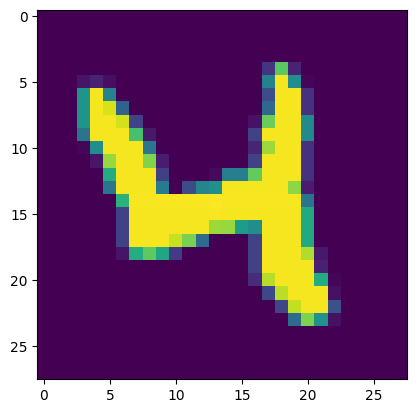

In [39]:
plt.imshow(X_train[20])
plt.show()

## 3. Building the CNN Model
 
We will now build our CNN model. The architecture includes convolutional layers, pooling layers, dropout layers, and dense layers.


In [40]:
# Set batch size, number of classes, and epochs
batch_size = 128
num_classes = 10
epochs = 10

In [41]:
# Initialize the model
model = Sequential()

In [42]:
# Add convolutional layers, max pooling, dropout, and dense layers
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

e:\deeplearning\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [44]:
# Display the model's architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,380,938 (9.08 MB)

 Trainable params: 2,380,938 (9.08 MB)

 Non-trainable params: 0 (0.00 B)

## 4. Training the Model
 
Before training, we need to convert the labels to one-hot encoding.

In [45]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [46]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [47]:
y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [48]:
# Train the model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))
print("The model has successfully trained")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 168ms/step - accuracy: 0.1456 - loss: 29.0548 - val_accuracy: 0.5683 - val_loss: 3.6456
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 184ms/step - accuracy: 0.3298 - loss: 12.6760 - val_accuracy: 0.7166 - val_loss: 1.7512
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 189ms/step - accuracy: 0.4432 - loss: 7.4278 - val_accuracy: 0.7761 - val_loss: 1.0950
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 88s 188ms/step - accuracy: 0.5105 - loss: 4.7657 - val_accuracy: 0.7998 - val_loss: 0.7886
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 88s 188ms/step - accuracy: 0.5454 - loss: 3.4632 - val_accuracy: 0.8103 - val_loss: 0.6547
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 189ms/step - accuracy: 0.5677 - loss: 2.6797 - val_accuracy: 0.8046 - val_loss: 0.6300
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 179ms/step - accuracy: 0.5753 - loss: 2.2476 - val_accuracy: 0.8044 - val_loss: 0.6491
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 181ms/step - accuracy: 0.5829 - loss:

## 5. Evaluating the Model

After training the model, we evaluate its performance on the test data.

In [49]:
# Make predictions on the test set
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


In [50]:
y_pred[10]

array([9.9767023e-01, 3.3394965e-06, 9.7009522e-04, 3.3116557e-05,
       1.2257821e-06, 2.2996646e-05, 6.9769421e-06, 2.2588280e-04,
       9.8603181e-05, 9.6757419e-04], dtype=float32)

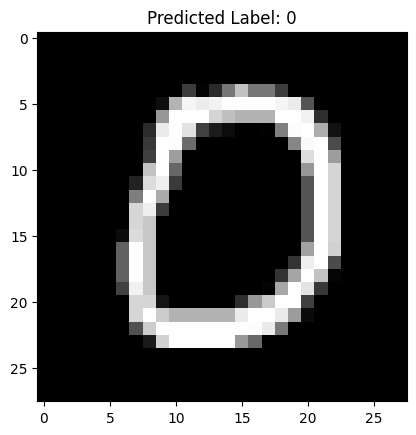

In [51]:
# Display the prediction for the 11th test image
plt.imshow(X_test[10].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {np.argmax(y_pred[10])}")
plt.show()

In [52]:
# Evaluate the model's accuracy on the test data
_, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy of Model is=> %.3f' % (acc * 100.0))

Accuracy of Model is=> 80.900
